In [1]:
from sklearn.preprocessing import MinMaxScaler
import numpy as np
import pandas as pd
import tensorflow as tf
import MIDASpy as md
import math


In [2]:
column_names=['column 1','column 2','column 3','column 4','column 5','column 6','column 7','column 8','column 9',]
df=pd.read_excel(r'C:\Users\furqz\OneDrive\Desktop\Data mining stiff\incomplete\Incomplete Datasets Without Labels\Glass\Glass_C_20.xlsx', header=None,names=column_names)
df

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9
0,1.52101,13.64,4.49,1.10,NaN,NaN,8.75,0.00,NaN
1,1.51761,13.89,3.60,1.36,72.73,NaN,7.83,0.00,0.0
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.0
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,NaN,0.0
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.0
...,...,...,...,...,...,...,...,...,...
209,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.0
210,1.51685,14.92,0.00,1.99,73.06,0.00,NaN,1.59,0.0
211,1.52065,14.36,0.00,2.02,NaN,0.00,8.44,1.64,NaN
212,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,NaN,0.0


In [3]:
print('dataType',end='\t')
print('column_names',end='\t')
print('Number of Nulls')
for name in column_names:
    print(df[name].dtype,end='\t\t')
    print(name,end='\t')
    print(df[name].isnull().sum())

dataType	column_names	Number of Nulls
float64		column 1	50
float64		column 2	38
float64		column 3	35
float64		column 4	41
float64		column 5	43
float64		column 6	44
float64		column 7	49
float64		column 8	39
float64		column 9	46


In [4]:
df.describe()

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9
count,164.000000,176.000000,179.000000,173.000000,171.000000,170.000000,165.000000,175.000000,168.000000
mean,1.518376,13.441705,2.674693,1.442254,72.631754,0.522000,8.909697,0.152743,0.056190
std,0.003095,0.838145,1.457644,0.496414,0.809461,0.717912,1.287442,0.460199,0.095803
min,1.511150,10.730000,0.000000,0.290000,69.810000,0.000000,5.430000,0.000000,0.000000
25%,1.516545,12.937500,2.035000,1.190000,72.195000,0.140000,8.300000,0.000000,0.000000
50%,1.517770,13.330000,3.480000,1.360000,72.760000,0.560000,8.600000,0.000000,0.000000
75%,1.519165,13.890000,3.600000,1.620000,73.085000,0.610000,9.130000,0.000000,0.100000
max,1.533930,17.380000,4.490000,3.500000,75.410000,6.210000,14.960000,2.880000,0.510000


<AxesSubplot:>

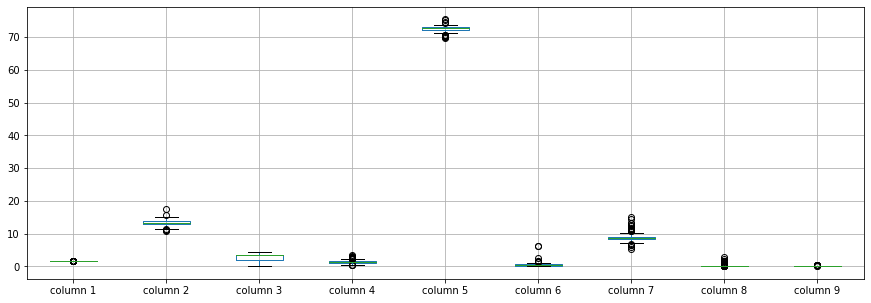

In [5]:
df.boxplot(return_type='axes', figsize=(15,5))

In [6]:
df.mean()

column 1     1.518376
column 2    13.441705
column 3     2.674693
column 4     1.442254
column 5    72.631754
column 6     0.522000
column 7     8.909697
column 8     0.152743
column 9     0.056190
dtype: float64

In [7]:
corr=df.corr()
corr

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9
column 1,1.000000,-0.161602,-0.061920,-0.437708,-0.665187,-0.283842,0.734128,-0.043177,0.030425
column 2,-0.161602,1.000000,-0.340311,0.242161,-0.011378,-0.271595,-0.318293,0.470609,-0.250685
column 3,-0.061920,-0.340311,1.000000,-0.476411,-0.232392,0.038166,-0.471551,-0.469858,0.122839
column 4,-0.437708,0.242161,-0.476411,1.000000,0.069947,0.295390,-0.261081,0.577875,-0.054592
column 5,-0.665187,-0.011378,-0.232392,0.069947,1.000000,-0.145451,-0.239270,-0.110198,-0.089188
column 6,-0.283842,-0.271595,0.038166,0.295390,-0.145451,1.000000,-0.334177,0.011030,-0.034208
column 7,0.734128,-0.318293,-0.471551,-0.261081,-0.239270,-0.334177,1.000000,-0.225039,0.085642
column 8,-0.043177,0.470609,-0.469858,0.577875,-0.110198,0.011030,-0.225039,1.000000,-0.136063
column 9,0.030425,-0.250685,0.122839,-0.054592,-0.089188,-0.034208,0.085642,-0.136063,1.000000


In [8]:
tf.compat.v1.reset_default_graph()
import tensorflow.compat.v1 as tf
tf.reset_default_graph()


In [9]:
imputer = md.Midas(layer_structure = [9,9+38,9+38+38,9+38+38+38,9+38+38+38+38,9+38+38+38+38+38,9+38+38+38+38+38+38,9+38+38+38+38+38,9+38+38+38+38,9+38+38+38,9+38+38,9+38,9], vae_layer = False, seed = 9)
imputer.build_model(df)
imputer.train_model(training_epochs=70)


Size index: [9]

Computation graph constructed

Model initialised

Epoch: 0 , loss: 82.32183133638821
Epoch: 1 , loss: 81.91852745643028
Epoch: 2 , loss: 81.88679856520433
Epoch: 3 , loss: 81.87830998347356
Epoch: 4 , loss: 81.83276689969577
Epoch: 5 , loss: 81.892698434683
Epoch: 6 , loss: 82.05065096341647
Epoch: 7 , loss: 82.20654883751503
Epoch: 8 , loss: 82.04959575946515
Epoch: 9 , loss: 81.73144120436449
Epoch: 10 , loss: 82.75530301607571
Epoch: 11 , loss: 82.11571443997897
Epoch: 12 , loss: 81.74071678748497
Epoch: 13 , loss: 82.08581132155199
Epoch: 14 , loss: 81.65709510216347
Epoch: 15 , loss: 81.63440763033353
Epoch: 16 , loss: 81.34890571007362
Epoch: 17 , loss: 82.13534428523137
Epoch: 18 , loss: 81.7102297269381
Epoch: 19 , loss: 81.5752933208759
Epoch: 20 , loss: 82.12225224421574
Epoch: 21 , loss: 81.32399573692909
Epoch: 22 , loss: 82.38303727370042
Epoch: 23 , loss: 81.21671823354868
Epoch: 24 , loss: 82.41858790471004
Epoch: 25 , loss: 81.62196291410007
Epoch: 26 ,

In [10]:
imputations=imputer.generate_samples(m=15).output_list
np.shape(imputations[-1])

INFO:tensorflow:Restoring parameters from tmp/MIDAS
Model restored.


(214, 9)

In [11]:
new_df=imputations[-1]
new_df.iloc[21,:]


column 1     0.498412
column 2    14.770000
column 3     3.750000
column 4     0.290000
column 5    72.020000
column 6     0.030000
column 7     9.000000
column 8     0.000000
column 9     0.000000
Name: 21, dtype: float64

In [12]:
complete_df=pd.read_excel(r'C:\Users\furqz\OneDrive\Desktop\Data mining stiff\complete\Original Datasets Without Labels\Glass.xlsx', header=None,names=column_names)

In [13]:
new_df-complete_df

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9
0,0.0,0.0,0.0,0.0,-28.369439,0.234432,0.000000,0.000000,-0.070703
1,0.0,0.0,0.0,0.0,0.000000,-0.136418,0.000000,0.000000,0.000000
2,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
3,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.036278,0.000000
4,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...
209,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
210,0.0,0.0,0.0,0.0,0.000000,0.000000,32.792902,0.000000,0.000000
211,0.0,0.0,0.0,0.0,-66.306745,0.000000,0.000000,0.000000,0.003121
212,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,-1.627890,0.000000


Calculating NRMSE Value

In [14]:

def Sum_new(sum):
    summ=0
    for n in sum:
        summ=summ+n
    return (summ)



In [15]:
def Frobenius_norm(number):
    num=number
    abs_val=num.abs()
    power_abs=abs_val**2
    sum1=power_abs.sum()
    total_sum=Sum_new(sum1)
    return(math.sqrt(total_sum))

In [16]:
numerator=Frobenius_norm(new_df-complete_df)
denominator=Frobenius_norm(complete_df)
numerator, denominator

(358.8331315060861, 1090.4359815890969)

In [17]:
NRMS=numerator/denominator
NRMS


0.3290730841283842

In [18]:
new_df.iloc[66,:]

column 1     1.52152
column 2    13.05000
column 3     3.65000
column 4     0.66837
column 5    72.22000
column 6     0.19000
column 7     9.85000
column 8     0.00000
column 9     0.17000
Name: 66, dtype: float64

In [19]:
imputations[-1]


,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9
0,1.52101,13.64,4.49,1.10,43.410561,0.294432,8.750000,0.000000,-0.070703
1,1.51761,13.89,3.60,1.36,72.730000,0.343582,7.830000,0.000000,0.000000
2,1.51618,13.53,3.55,1.54,72.990000,0.390000,7.780000,0.000000,0.000000
3,1.51766,13.21,3.69,1.29,72.610000,0.570000,8.220000,0.036278,0.000000
4,1.51742,13.27,3.62,1.24,73.080000,0.550000,8.070000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...
209,1.51623,14.14,0.00,2.88,72.610000,0.080000,9.180000,1.060000,0.000000
210,1.51685,14.92,0.00,1.99,73.060000,0.000000,41.192902,1.590000,0.000000
211,1.52065,14.36,0.00,2.02,7.113255,0.000000,8.440000,1.640000,0.003121
212,1.51651,14.38,0.00,1.94,73.610000,0.000000,8.480000,-0.057890,0.000000


In [21]:
imputations[-1].to_excel("Glass_C_20(imp).xlsx", index=False, header=False)